# Import Library

In [0]:
import numpy as np
import keras 
from keras.layers import Dense,Flatten, Dropout,Conv2D,MaxPooling2D,Activation
from keras.models import Sequential
from keras.regularizers import l2
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocessing

In [3]:
print("X_train shape : {}".format(x_train.shape))
print("X_test shape  : {}".format(x_test.shape))

X_train shape : (60000, 28, 28)
X_test shape  : (10000, 28, 28)


In [0]:
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test  = x_test.reshape(10000, 28, 28, 1).astype('float32')

x_train /= 255
x_test /= 255

In [5]:
print("X_train shape : {}".format(x_train.shape))
print("X_test shape  : {}".format(x_test.shape))

X_train shape : (60000, 28, 28, 1)
X_test shape  : (10000, 28, 28, 1)


## Convert Labels to Categorical

In [0]:
n_classes = 10 #because we have 10 output

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [7]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Create Model

In [0]:
model = Sequential()

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3),padding='same' ,activation='relu',input_shape=(28, 28, 1), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
          
model.add(Flatten())
model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 4, 4, 64)          36928     
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='RMSprop'  ,metrics=['accuracy'])

## Run Model

In [28]:
model.fit(x_train, y_train, epochs=50, batch_size=128 ,validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 11s 191us/step - loss: 0.8894 - acc: 0.8118 - val_loss: 0.2271 - val_acc: 0.9747
Epoch 2/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.2902 - acc: 0.9450 - val_loss: 0.1402 - val_acc: 0.9806
Epoch 3/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.2159 - acc: 0.9574 - val_loss: 0.1096 - val_acc: 0.9848
Epoch 4/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.1866 - acc: 0.9637 - val_loss: 0.1001 - val_acc: 0.9856
Epoch 5/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.1699 - acc: 0.9667 - val_loss: 0.1003 - val_acc: 0.9848
Epoch 6/50
60000/60000 [==============================] - 6s 102us/step - loss: 0.1586 - acc: 0.9687 - val_loss: 0.0845 - val_acc: 0.9871
Epoch 7/50
60000/60000 [==============================] - 6s 103us/step -

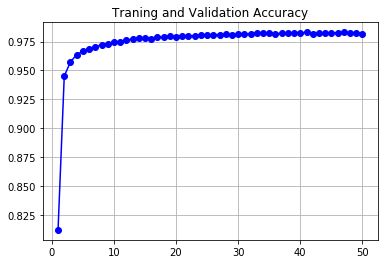

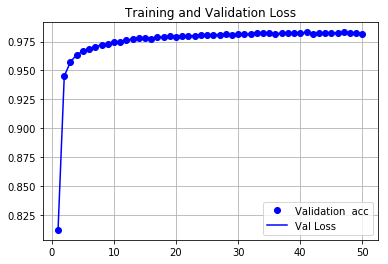

In [36]:
acc      = model.history.history['acc']
val_acc  = model.history.history['acc']

loss     = model.history.history['acc']
val_loss = model.history.history['acc']

epochs = range(1, len(acc) + 1)

plt.grid()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Loss acc')
plt.title('Traning and Validation Accuracy')
plt.figure()
plt.grid()

plt.plot(epochs, loss, 'bo', label='Validation  acc')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training and Validation Loss')
plt.legend()